<a href="https://colab.research.google.com/github/lisatwyw/ccai2023/blob/main/PA_mean_squared_error_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Administrative setup

- Execute code below to mount drive, install packages, and download resources.

- Click on these buttons when the 2 pop-up windows show up:

<img src="https://raw.githubusercontent.com/lisatwyw/CS4SocialGood/main/ccai/Mount.png" width="500"/>

In [1]:
# mount drive for permanent storage

import os, sys
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

try:
  !mkdir /content/drive/MyDrive/purple_air
  !mkdir /content/drive/MyDrive/purple_air/packages
except:
  pass

os.chdir('/content/drive/MyDrive/purple_air/')
nb_path = 'mypackages'

try:
  # create symbolic path
  os.symlink('/content/drive/MyDrive/purple_air/packages', nb_path)

  # install once to symbolic path
  !pip install --target=$nb_path lale
  !pip install --target=$nb_path daymetpy
  !pip install --target=$nb_path geomdl
  #!pip install --target=$nb_path -U fastapi python-multipart uvicorn kaleido
  !pip install --target=$nb_path -U plotly
except:
  pass

sys.path.insert(0, '/content/drive/MyDrive/purple_air/')

!ls /content/drive/MyDrive/purple_air/

Mounted at /content/drive
mkdir: cannot create directory ‘/content/drive/MyDrive/purple_air’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/purple_air/packages’: File exists
'Copy of PA_Oakland_2012_daily.csv'   PA_data_for_modeling_2017.csv
'Copy of PA_Oakland_2013_daily.csv'   PA_data_for_modeling_2018.csv
'Copy of PA_Oakland_2014_daily.csv'   PA_data_for_modeling_2019.csv
'Copy of PA_Oakland_2015_daily.csv'   PA_data_for_modeling_2020.csv
'Copy of PA_Oakland_2016_daily.csv'   PA_data_for_modeling_2021.csv
'Copy of PA_Oakland_2017_daily.csv'   PA_data_for_modeling_2022.csv
'Copy of PA_Oakland_2018_daily.csv'   PA_Oakland_2012_daily.csv
'Copy of PA_Oakland_2019_daily.csv'   PA_Oakland_2013_daily.csv
'Copy of PA_Oakland_2020_daily.csv'   PA_Oakland_2014_daily.csv
'Copy of PA_Oakland_2021_daily.csv'   PA_Oakland_2015_daily.csv
 Lat_long_PA_sensors_full.csv	      PA_Oakland_2016_daily.csv
 model.py			      PA_Oakland_2017_daily.csv
 mypackages			      PA_Oakland_2018

## Check for the precomputed files...

```
Collecting daymetpy
  Downloading daymetpy-1.0.0.tar.gz (3.4 kB)
  Preparing metadata (setup.py) ... done
Building wheels for collected packages: daymetpy
  Building wheel for daymetpy (setup.py) ... done
  Created wheel for daymetpy: filename=daymetpy-1.0.0-py3-none-any.whl size=4094 sha256=02cba4ef9e6a078a65eae7b80e803da850cb9a51ee06f8d896a974e9ad6c5fca
  Stored in directory: /root/.cache/pip/wheels/56/d2/10/a37e259b28ccac8537185688acfb45913df0b826d5ad3962d7
Successfully built daymetpy
Installing collected packages: daymetpy
Successfully installed daymetpy-1.0.0


Collecting geomdl
  Downloading geomdl-5.3.1-py2.py3-none-any.whl (147 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 2.0 MB/s eta 0:00:00
Installing collected packages: geomdl
Successfully installed geomdl-5.3.1



Collecting fastapi
  Using cached fastapi-0.104.0-py3-none-any.whl (92 kB)
Collecting python-multipart
  Using cached python_multipart-0.0.6-py3-none-any.whl (45 kB)
Collecting uvicorn
  Using cached uvicorn-0.23.2-py3-none-any.whl (59 kB)
Collecting kaleido
  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl (79.9 MB)
Collecting anyio<4.0.0,>=3.7.1 (from fastapi)
  Using cached anyio-3.7.1-py3-none-any.whl (80 kB)
Collecting pydantic!=1.8,!=1.8.1,!=2.0.0,!=2.0.1,!=2.1.0,<3.0.0,>=1.7.4 (from fastapi)
  Using cached pydantic-2.4.2-py3-none-any.whl (395 kB)
Collecting starlette<0.28.0,>=0.27.0 (from fastapi)
  Using cached starlette-0.27.0-py3-none-any.whl (66 kB)
Collecting typing-extensions>=4.8.0 (from fastapi)
  Using cached typing_extensions-4.8.0-py3-none-any.whl (31 kB)
Collecting click>=7.0 (from uvicorn)
  Using cached click-8.1.7-py3-none-any.whl (97 kB)
Collecting h11>=0.8 (from uvicorn)
  Using cached h11-0.14.0-py3-none-any.whl (58 kB)
Collecting idna>=2.8 (from anyio<4.0.0,>=3.7.1->fastapi)
  Using cached idna-3.4-py3-none-any.whl (61 kB)
Collecting sniffio>=1.1 (from anyio<4.0.0,>=3.7.1->fastapi)
  Using cached sniffio-1.3.0-py3-none-any.whl (10 kB)
Collecting exceptiongroup (from anyio<4.0.0,>=3.7.1->fastapi)
  Using cached exceptiongroup-1.1.3-py3-none-any.whl (14 kB)
Collecting annotated-types>=0.4.0 (from pydantic!=1.8,!=1.8.1,!=2.0.0,!=2.0.1,!=2.1.0,<3.0.0,>=1.7.4->fastapi)
  Using cached annotated_types-0.6.0-py3-none-any.whl (12 kB)
Collecting pydantic-core==2.10.1 (from pydantic!=1.8,!=1.8.1,!=2.0.0,!=2.0.1,!=2.1.0,<3.0.0,>=1.7.4->fastapi)
  Using cached pydantic_core-2.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.0 MB)
Installing collected packages: kaleido, typing-extensions, sniffio, python-multipart, idna, h11, exceptiongroup, click, annotated-types, uvicorn, pydantic-core, anyio, starlette, pydantic, fastapi
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
tensorflow 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.8.0 which is incompatible.
Successfully installed annotated-types-0.6.0 anyio-3.7.1 click-8.1.7 exceptiongroup-1.1.3 fastapi-0.104.0 h11-0.14.0 idna-3.4 kaleido-0.2.1 pydantic-2.4.2 pydantic-core-2.10.1 python-multipart-0.0.6 sniffio-1.3.0 starlette-0.27.0 typing-extensions-4.8.0 uvicorn-0.23.2

```

In [2]:
import requests
import pandas as pd # circular imports?

from datetime import datetime
import time
import json
import io
from io import StringIO
import geopandas
import matplotlib.pyplot as plt
from matplotlib import cm

import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import MarkerCluster, BeautifyIcon
import branca

# Import the daymetpy package
# import daymetpy

# Import packages for multiprocessing
import itertools
import multiprocessing as mp
from multiprocessing.pool import ThreadPool

from shapely.geometry import Point, Polygon

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn' # You can turn off these warnings if you know what you are doing by using
import polars as pol

import math
import numpy as np



## 2a. Steps to download PurpleAir

1. Visit [this page](https://develop.purpleair.com/keys)
2. Click "Add" button (top left)
3. Click "Add" button (bottom right)

![image](https://global.discourse-cdn.com/business7/uploads/purpleair/optimized/2X/d/d47145bfc7631a5b48b6aa006c320562a04358ac_2_690x318.png)


In [3]:
!curl -X GET "https://api.purpleair.com/v1/keys" -H "X-API-Key: xxxxxxxx-xxxx-xxxx-xxxx-xxxxxxxxxxx"

{
  "api_version" : "V1.0.11-0.0.49",
  "time_stamp" : 1697778028,
  "error" : "ApiKeyInvalidError",
  "description" : "The provided api_key was not valid."
}

In [4]:
!curl -X GET "https://api.purpleair.com/v1/keys"

{
  "api_version" : "V1.0.11-0.0.49",
  "time_stamp" : 1697778029,
  "error" : "ApiKeyMissingError",
  "description" : "No API key was found in the request."
}

# 2b. Read in the pre-downloaded and merged dataframe

In [5]:
YEAR = 2021

pa_df = pd.read_csv(f'PA_data_for_modeling_{YEAR}.csv')
sensor_list1 = pa_df.drop_duplicates(subset=['latitude', 'longitude'], keep='last') # latest snapshot
sensor_list = pa_df.drop_duplicates(subset=['latitude', 'longitude'], keep='first') # earliest snapshot

key_to_predict ='pm10.0_atm'
max_value = pa_df[key_to_predict ].max()
min_value = pa_df[key_to_predict ].min()
print( min_value, max_value )
nlevels = 5 # color levels
# define colours for each level
ss_colors=['#ff00ff', '#ff40bf', '#ff807f', '#ffc03f', '#ffff00']

mx, mn = np.int64(max_value) -1,  np.int64(min_value)
sensor_list.head()

0.0 3401.9725


,Unnamed: 0,time_stamp,humidity,temperature,pressure,pm10.0_atm,pm10.0_cf_1,sensor,timestamp_local,name,sensor_index_x,latitude,longitude,sensor_index_y,Datestamp,prcp,srad,Latitude,Longitude
0,0,1.609459e+09,44.572,56.400,999.702,13.4645,13.5875,4389.0,2021-01-01,Orinda,4389.0,37.846275,-122.157290,4389,2021-01-01,2.85,159.28,37.846275,-122.157290
365,730,1.609459e+09,47.501,58.946,1019.024,1875.1280,2807.6920,11726.0,2021-01-01,North Oakland IAQ house,11726.0,37.846310,-122.266120,11726,2021-01-01,3.45,160.83,37.846310,-122.266120
730,2555,1.609459e+09,52.475,57.997,1007.458,8.6835,8.6925,18997.0,2021-01-01,Head-Royce School,18997.0,37.808174,-122.204740,18997,2021-01-01,3.18,165.10,37.808174,-122.204740
1095,2920,1.609459e+09,54.997,56.168,999.270,10.8945,10.8945,19273.0,2021-01-01,Sims Drive,19273.0,37.821156,-122.209370,19273,2021-01-01,3.52,163.99,37.821156,-122.209370
1460,3285,1.609459e+09,53.667,58.360,1007.856,10.4370,10.4545,19275.0,2021-01-01,"Piedmont, CA",19275.0,37.823654,-122.230865,19275,2021-01-01,3.37,163.56,37.823654,-122.230865


In [6]:
from folium.features import DivIcon

def draw( sensor_list, ss_filtered_legend_index, annotate=True, description='first' ):
  # create nao
  map = folium.Map(location=[sensor_list['latitude'].mean(), sensor_list['longitude'].mean()], zoom_start=13, control_scale=True)

  # add annotations on the map

  # - for each sensor location, add diamond whose size represents measured value
  for index, row in sensor_list.iterrows():
      local_deformation = math.cos(row['latitude'] * math.pi / 180)
      size = row[ key_to_predict ]*60/max_value * local_deformation

      folium.features.RegularPolygonMarker(
                  location =[row['latitude'], row['longitude']],
                  radius   = size,
                  fill_color=ss_colors[row['color_labels']],
                  color = ss_colors[row['color_labels']],
      ).add_to(map)

      if annotate:
        folium.map.Marker( [row['latitude'], row['longitude']],
                  icon=DivIcon(
                  icon_size=(250,36),
                  icon_anchor=(0,0),
                  html='<div style="font-size: 4pt">%s</div>'% row['sensor'] )
        ).add_to(map)

  sw = sensor_list[['latitude', 'longitude']].min().values.tolist()
  ne = sensor_list[['latitude', 'longitude']].max().values.tolist()

  # # Get maximum quantity of emissions from stationary source
  colormap = branca.colormap.LinearColormap(ss_colors,
                                            index=ss_filtered_legend_index[1:],
                                            vmin=0, vmax=max_value,
                                            caption= f'{key_to_predict} measured on {description} day' )
  colormap.add_to(map)
  if 1:
    svg_style = '<style>svg#legend {font-size: 14px; background-color: white;}</style>'
    map.get_root().header.add_child(folium.Element(svg_style))

  bw = 0.005 # width of bounding box
  map.fit_bounds([ [sw[0]-bw,sw[1]-bw], [ne[0]+bw, ne[1]+bw] ] )
  return map


sensor_list['color_labels'] = pd.cut(sensor_list[ key_to_predict ], 5, labels=[0,1,2,3,4], retbins=True)[0]
ss_filtered_legend_index = pd.cut(sensor_list[ key_to_predict ], 5, labels=[0,1,2,3,4], retbins=True)[1]
map0 = draw( sensor_list, ss_filtered_legend_index )


sensor_list1['color_labels'] = pd.cut(sensor_list1[ key_to_predict ], 5, labels=[0,1,2,3,4], retbins=True)[0]
ss_filtered_legend_index1 = pd.cut(sensor_list1[ key_to_predict ], 5, labels=[0,1,2,3,4], retbins=True)[1]
map1 = draw( sensor_list1, ss_filtered_legend_index1, True, 'last' )

from IPython.core.display import display, HTML
#from IPython.display import IFrame

htmlmap = HTML('<iframe srcdoc="{}" style="float:left; width: {}px; height: {}px; display:inline-block; width: 50%; margin: 0 auto; border: 0px solid black"></iframe>'
           '<iframe srcdoc="{}" style="float:right; width: {}px; height: {}px; display:inline-block; width: 50%; margin: 0 auto; border: 0px solid black"></iframe>'
           .format(map0.get_root().render().replace('"', '&quot;'),100, 300,
                   map1.get_root().render().replace('"', '&quot;'),100, 300))
display(htmlmap)


/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# Naive surface-fitting

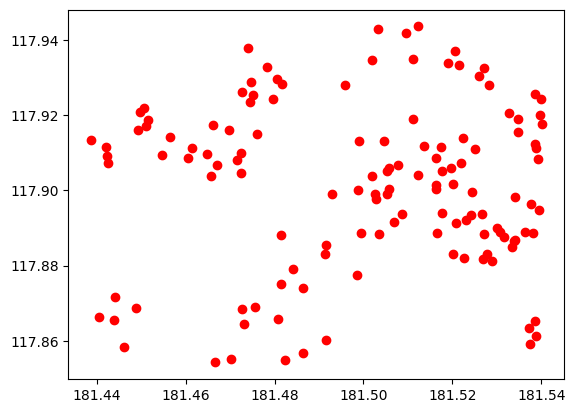

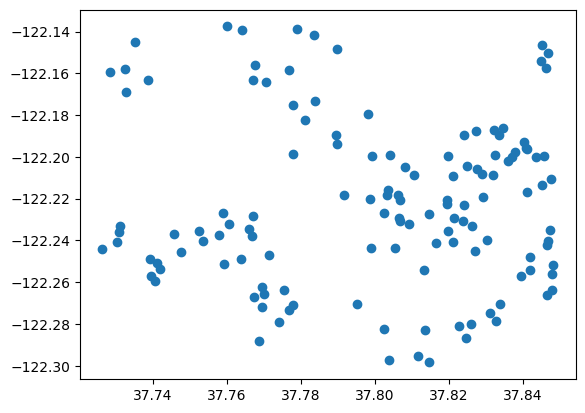

In [7]:
%matplotlib inline

MAP_WIDTH, MAP_HEIGHT = 300, 100
x = ((MAP_WIDTH/360.0) * (180 + sensor_list.latitude.values ));   # translate x and rescaled
y = ((MAP_HEIGHT/180.0) * (90 - sensor_list.longitude.values ));  # reflect y and rescaled

plt.scatter( x, y, color='red' )
plt.figure()
plt.scatter( sensor_list.latitude.values, sensor_list.longitude.values )

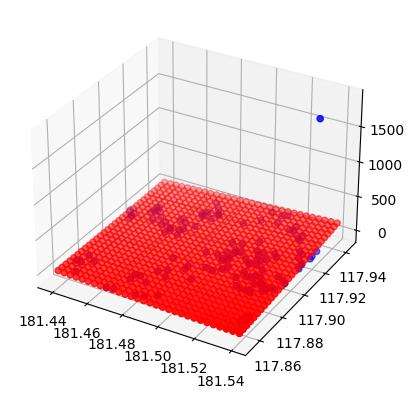

In [8]:
%matplotlib inline

import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# test function
def function(data, p00, p10, p01, p20, p11, p02, p21, p12, p03 ):
    x = data[0]
    y = data[1]
    d = p00 + p10*x + p01*y + p20*(x**2) + p11*x*y + p02*(y**2) + p21*(x**2)*y + p12*x*(y**2) + p03*(y**3)
    return d

#x_data = sensor_list.latitude
#y_data = sensor_list.longitude
x_data = ((MAP_WIDTH/360.0) * (180 + sensor_list.latitude));
y_data = ((MAP_HEIGHT/180.0) * (90 - sensor_list.longitude));
z_data = sensor_list[ key_to_predict ]

# get fit parameters from scipy curve fit
parameters, covariance = curve_fit(function, [x_data, y_data], z_data)

# create surface function model
# setup data points for calculating surface model
model_x_data = np.linspace(min(x_data), max(x_data), 30)
model_y_data = np.linspace(min(y_data), max(y_data), 30)

# create coordinate arrays for vectorized evaluations
X, Y = np.meshgrid(model_x_data, model_y_data)

# calculate Z coordinate array
Z = function(np.array([X, Y]), *parameters)

# setup figure object
fig = plt.figure()
ax = plt.axes(projection ="3d")
ax.scatter3D(x_data, y_data, z_data, color = "blue")
ax.scatter3D(X, Y, Z, color = "red")

In [9]:
parameters

array([ 2.45356863e+08, -6.78524125e+05, -2.38618481e+05, -4.24067821e+03,
       -4.16757041e+03, -1.47360909e+04,  5.41314228e+01,  2.82685827e+01,
        3.54422076e+01])

In [10]:
Z_est = function(np.array([x_data, y_data]), *parameters)
rmse = np.sqrt( np.mean( (Z_est - z_data)**2 ))
rmse

158.1430996585058

## Distances between pairs of sensors

<Axes: >

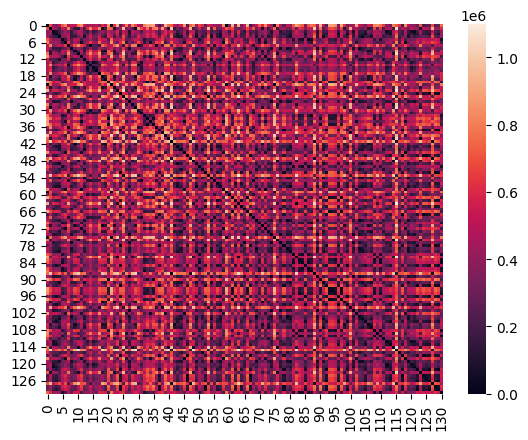

In [11]:
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns

n=sensor_list.shape[0]
dist = np.zeros( (n,n) )
for a,(lat1,long1) in enumerate( zip( list(sensor_list.latitude.values), list(sensor_list.longitude.values) ) ):
    for b,(lat2,long2) in enumerate( zip( list(sensor_list.latitude.values), list(sensor_list.longitude.values) ) ):
      if (a != b):
        # ACOS( SIN(lat1)*SIN(lat2) + COS(lat1)*COS(lat2)*COS(lon2-lon1) ) * 6371000
        d=np.arccos( np.sin(lat1)*np.sin(lat2) + np.cos( lat1)*np.cos(lat2) *np.cos(long1-long2) ) * 6371000
        dist[a,b]= dist[b,a] = d

sns.heatmap( dist )
#plt.imshow(dist)

In [12]:
j=1

s1=sensor_list['sensor'].values[j]
q = np.argmax( dist[:, j ] )
s2=sensor_list['sensor'].values[q]


# Starter's benchmark


Goal of this section is to setup a forecast formulation:

$\hat{y}_i^{t+1} = f( y^{1:t}_i )$

where $y_i^{t+1}$ is the measured PM10 for sensor $i$ at time $t$+1 given measurements made from timepoints 1 to $t$


At the end of this section, we compare performances of different RNN architectures and examine the effects of inclusions of other time-series, e.g.

$\hat{y}_i^{t+1} = f( y^{1:t}_i , \text{radiation}_i^{1:t} )$

...

$\hat{y}_i^{t+1} = f( y^{1:t}_i , \text{radiation}_i^{1:t}, \text{temperature}_i^{1:t}, \text{pressure}_i^{1:t} )$



In [13]:
grps=pa_df.groupby( by='sensor')
grps.groups.keys()

dict_keys([4389.0, 11726.0, 18997.0, 19273.0, 19275.0, 19299.0, 19471.0, 19509.0, 27135.0, 36355.0, 37149.0, 37311.0, 37491.0, 38193.0, 41503.0, 46127.0, 46331.0, 53219.0, 53463.0, 53963.0, 54837.0, 55617.0, 55811.0, 55817.0, 55833.0, 55915.0, 55961.0, 55991.0, 56281.0, 59711.0, 59737.0, 59921.0, 60025.0, 60167.0, 60333.0, 60653.0, 60711.0, 61191.0, 61359.0, 61423.0, 61439.0, 61621.0, 62227.0, 62363.0, 62481.0, 63257.0, 63509.0, 63553.0, 63605.0, 63849.0, 63981.0, 64389.0, 64423.0, 64429.0, 64953.0, 65225.0, 65227.0, 65251.0, 65375.0, 65747.0, 65787.0, 65867.0, 65901.0, 66155.0, 67091.0, 67261.0, 67325.0, 67359.0, 67787.0, 67801.0, 67943.0, 68437.0, 68657.0, 68711.0, 68943.0, 69101.0, 69121.0, 69131.0, 69249.0, 69323.0, 69587.0, 69851.0, 70015.0, 70109.0, 70117.0, 70663.0, 70669.0, 71453.0, 71461.0, 71503.0, 71637.0, 71797.0, 72609.0, 73149.0, 73231.0, 73565.0, 74161.0, 74481.0, 75139.0, 75223.0, 76071.0, 76125.0, 76695.0, 77149.0, 77221.0, 77397.0, 77457.0, 77887.0, 78475.0, 78823.0, 

In [14]:
# sensor lists are identical during this year if the intersection is empty
np.setdiff1d( sensor_list.sensor, sensor_list1.sensor )


array([], dtype=float64)

In [15]:
if 0:
  s1,s2=13997, 15645 # neighbouring sensors
  s1,s2=87307, 82105 # neighbouring sensors
  s1,s2=87307, 17927 # distant neighbours
  s1,s2=87307, 17927 # distant neighbours

     latitude  longitude
365  37.84631 -122.26612
        latitude  longitude
41975  37.735344 -122.14488


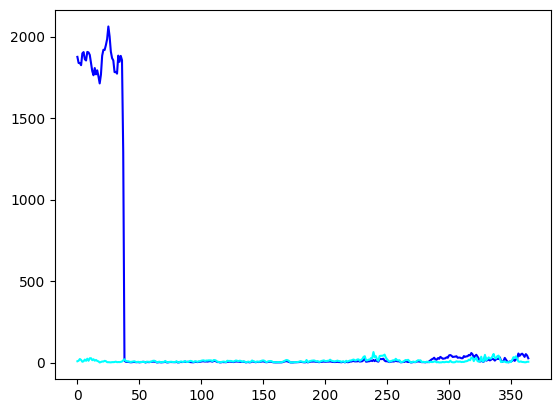

In [16]:
key_to_predict = 'pm10.0_atm'

print( pa_df.loc[ grps.groups[s1] ][ ['latitude','longitude'] ].head(1) )
print( pa_df.loc[ grps.groups[s2] ][ ['latitude','longitude'] ].head(1) )

xx = np.arange(365)

plt.plot( xx, pa_df.loc[grps.groups[s1]][ key_to_predict ], color='blue')
plt.plot( xx, pa_df.loc[grps.groups[s2]][ key_to_predict ], color='cyan')


# 4a. Develop and evaluate univariate forecast models

## Example experimenal setup

| | | |
| :-- | :-- | :-- |
| Sensor 1 | TRN | VAL |
| Sensor 2 | TST  |



In [17]:
trn = pa_df.loc[grps.groups[s1]].iloc[0:365//3,:]
val = pa_df.loc[grps.groups[s1]].iloc[(365//3):(2*365//3),: ]

trn.head(2)

,Unnamed: 0,time_stamp,humidity,temperature,pressure,pm10.0_atm,pm10.0_cf_1,sensor,timestamp_local,name,sensor_index_x,latitude,longitude,sensor_index_y,Datestamp,prcp,srad,Latitude,Longitude
365,730,1.609459e+09,47.501,58.946,1019.024,1875.128,2807.6920,11726.0,2021-01-01,North Oakland IAQ house,11726.0,37.84631,-122.26612,11726,2021-01-01,3.45,160.83,37.84631,-122.26612
366,731,1.609546e+09,58.578,59.605,1021.739,1837.570,2753.3995,11726.0,2021-01-02,North Oakland IAQ house,11726.0,37.84631,-122.26612,11726,2021-01-02,2.48,73.30,37.84631,-122.26612


In [18]:
trn.tail(2)

,Unnamed: 0,time_stamp,humidity,temperature,pressure,pm10.0_atm,pm10.0_cf_1,sensor,timestamp_local,name,sensor_index_x,latitude,longitude,sensor_index_y,Datestamp,prcp,srad,Latitude,Longitude
484,849,1.619741e+09,36.592,74.94,1018.840,2.485,2.485,11726.0,2021-04-30,North Oakland IAQ house,11726.0,37.84631,-122.26612,11726,2021-04-30,0.0,427.14,37.84631,-122.26612
485,850,1.619827e+09,52.803,65.06,1015.843,1.738,1.743,11726.0,2021-05-01,North Oakland IAQ house,11726.0,37.84631,-122.26612,11726,2021-05-01,0.0,442.65,37.84631,-122.26612


Train using data from first 14; early stop using data from next 14; test on a different sensor
tst, MdAE=6.520, RMSE=32.455, Spearman=0.520
Train using data from first 14; early stop using data from next 14; test on a different sensor
tst, MdAE=6.124, RMSE=14.014, Spearman=0.344
Train using data from first 14; early stop using data from next 14; test on a different sensor
tst, MdAE=0.030, RMSE=0.035, Spearman=0.452
Train using data from first 14; early stop using data from next 14; test on a different sensor
tst, MdAE=0.016, RMSE=0.022, Spearman=0.389
Train using data from first 14; early stop using data from next 14; test on a different sensor
tst, MdAE=0.003, RMSE=0.005, Spearman=0.465
Train using data from first 14; early stop using data from next 14; test on a different sensor
tst, MdAE=0.002, RMSE=0.005, Spearman=0.436
CPU times: user 1min 15s, sys: 1.5 s, total: 1min 17s
Wall time: 1min 10s


,setting,R2,RMSE,MdAE
0,bilstm-uni-,0.5197214257771009,6.519712844848634,32.454509893122406
1,lstm-uni-,0.343907782766386,6.124216480255127,14.014440629863486
2,bilstm-uni-SC1,0.45151088158445,0.03041967418698499,0.03454988322665833
3,lstm-uni-SC1,0.38890986714049003,0.015789031732129755,0.021811483340107372
4,bilstm-uni-SC2,0.464915672169198,0.002982056982940573,0.004781907342982811
5,lstm-uni-SC2,0.43605036880136416,0.0017314887018376468,0.004987260942428789


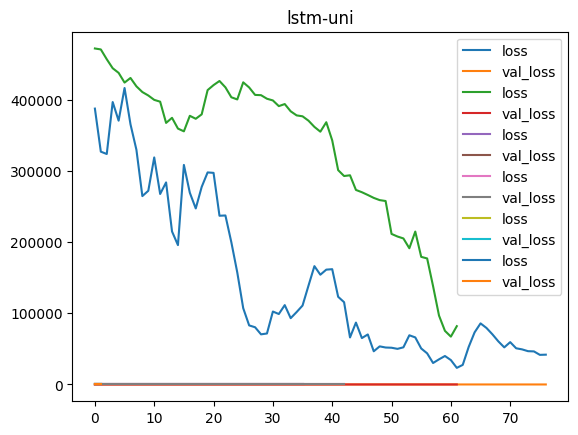

In [19]:
%%time

# https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

import tensorflow as tf

from numpy import array
import keras
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional, GRU
from keras.layers import Dense

from keras.layers import Bidirectional
import scipy
from sklearn.preprocessing import StandardScaler

def eval_model(model, X, Y ):
  m1,m2,m3=[],[],[]
  t='tst'
  yhat = model.predict(X[t], verbose=0)
  spearman_stats=scipy.stats.spearmanr( Y[t], yhat.squeeze(), )
  delta = np.abs(Y[t]- yhat.squeeze() )
  MdAE = np.median( delta )
  RMSE = np.sqrt( np.mean( delta**2 ))
  print( f'{t}, MdAE={MdAE:.3f}, RMSE={RMSE:.3f}, Spearman={spearman_stats[0]:.3f}' )
  if len(m1)==0:
    return spearman_stats[0], MdAE, RMSE
  else:
    m1.append( spearman_stats[0] )
    m2.append( MdAE )
    m3.append( RMSE )
    return np.array(m1), np.array(m2), np.array(m3)

def train_eval_univariate(s1, s2, mid = 'lstm-uni', k = 'pm10.0_atm' ):

  # split a univariate sequence into samples
  def split_sequence(sequence, n_days, S=None):

    sequence=sequence.reshape(-1,1) # for rescaling 1D

    if suffix == '-':
      S = None
    else:
      if S is None:
        if suffix == '-SC1':
          S = StandardScaler()
        elif suffix == '-SC2':
          S = Pipeline( [('standardizer', StandardScaler()), ('scaler', MinMaxScaler())]  )
        sequence = S.fit_transform( sequence )
      else:
        sequence = S.transform(sequence)

    X, y = list(), list()
    for i in range(len(sequence)):
      # find the end of this pattern
      end_ix = i + n_days
      # check if we are beyond the sequence
      if end_ix > len(sequence)-1:
        break
      # gather input and output parts of the pattern
      seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
      X.append(seq_x)
      y.append(seq_y)

    return np.array(X), np.array(y), S


  # split the 1d sequence into forecasting training set
  X,Y={},{}

  print( f'Train using data from first {n_days}; early stop using data from next {n_days}; test on a different sensor')

  trn = pa_df.loc[grps.groups[s1]][key_to_predict][0:365//3].values
  val = pa_df.loc[grps.groups[s1]][key_to_predict][(365//3):(2*365//3)].values

  # test on a different sensor
  tst = pa_df.loc[grps.groups[s2]][key_to_predict].values

  t='trn'; X[t], Y[t], Scaler = split_sequence(trn, n_days)
  t='val'; X[t], Y[t], _ = split_sequence(val, n_days, Scaler)
  t='tst'; X[t], Y[t], _ = split_sequence(tst, n_days, Scaler)

  # no longer true after rescaling...
  # t='trn'; assert trn[:n_days+1][-1] == Y[t][0]   #  trn[:15] is a concatenation of  X[t][0] and Y[t][0]

  model = Sequential()
  if 'bi' in mid:
    model.add(Bidirectional( LSTM(50, activation='relu', return_sequences=True, input_shape=(n_days, n_features))) )
    model.add(Bidirectional( LSTM(50, activation='relu', ) ))
  else:
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_days, n_features)) )
    model.add(LSTM(50, activation='relu'))

  model.add(Dense(1))

  LR=0.0001
  opt = keras.optimizers.Adam(learning_rate=LR )
  model.compile(optimizer=opt, loss=LOSS )

  C = []
  C.append( tf.keras.callbacks.EarlyStopping(monitor="val_loss",
            min_delta=0,
            patience=0,
            verbose=0,
            mode="auto",
            baseline=None,
            restore_best_weights=False,
            start_from_epoch=0,)
  )
  t='trn'
  h = model.fit(X[t], Y[t], validation_data=(X['val'], Y['val']), epochs=5000, verbose=0, callbacks=C)
  hist = h.history

  for kk in hist.keys():
    plt.plot( hist[kk], label=kk )
  plt.title( mid )
  plt.legend()
  return model, X, Y







n_days, n_features = 14, 1 # 2-week period

LOSS='mean_squared_logarithmic_error'
LOSS='mean_absolute_percentage_error'
LOSS='mean_absolute_error'

LOSS='mean_squared_error'

Res_DF=pd.DataFrame( columns=['setting', 'R2', 'RMSE', 'MdAE'] )

for suffix in ['-','-SC1','-SC2']:
  for mid in [f'bilstm-uni', f'lstm-uni']:
    model, X, Y, = train_eval_univariate(s1, s2, mid )
    a,b,c = eval_model(model, X, Y )
    Res_DF.loc[len(Res_DF)] = np.array( [mid+suffix, a,b,c])

Res_DF.head(1000)


# 4b. Develop and evaluate multi-variable forecast models

In [20]:
Res_DF

,setting,R2,RMSE,MdAE
0,bilstm-uni-,0.5197214257771009,6.519712844848634,32.454509893122406
1,lstm-uni-,0.343907782766386,6.124216480255127,14.014440629863486
2,bilstm-uni-SC1,0.45151088158445,0.03041967418698499,0.03454988322665833
3,lstm-uni-SC1,0.38890986714049003,0.015789031732129755,0.021811483340107372
4,bilstm-uni-SC2,0.464915672169198,0.002982056982940573,0.004781907342982811
5,lstm-uni-SC2,0.43605036880136416,0.0017314887018376468,0.004987260942428789


window size of 14 days 6 features
dont preprocess
dont preprocess
dont preprocess
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 14, 50)            11400     
                                                                 
 lstm_13 (LSTM)              (None, 50)                20200     
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 31651 (123.64 KB)
Trainable params: 31651 (123.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
tst, MdAE=337.166, RMSE=399.544, Spearman=-0.078
window size of 14 days 2 features
dont preprocess
dont preprocess
dont preprocess
Model: "sequential_7"
________________________________________

<timed exec>:102: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 14, 50)            10600     
                                                                 
 lstm_41 (LSTM)              (None, 50)                20200     
                                                                 
 dense_26 (Dense)            (None, 1)                 51        
                                                                 
Total params: 30851 (120.51 KB)
Trainable params: 30851 (120.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
tst, MdAE=0.380, RMSE=1.095, Spearman=0.379
window size of 14 days 2 features
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 14, 5

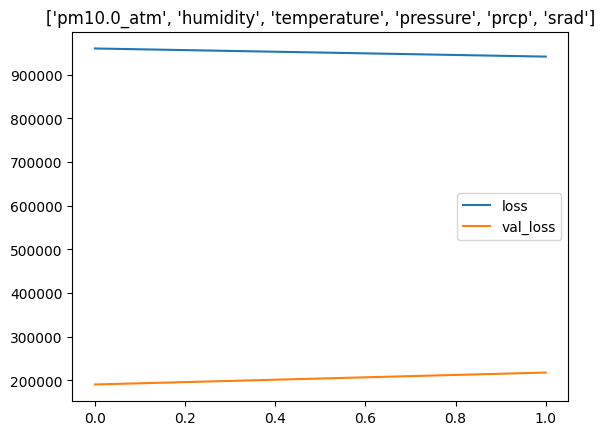

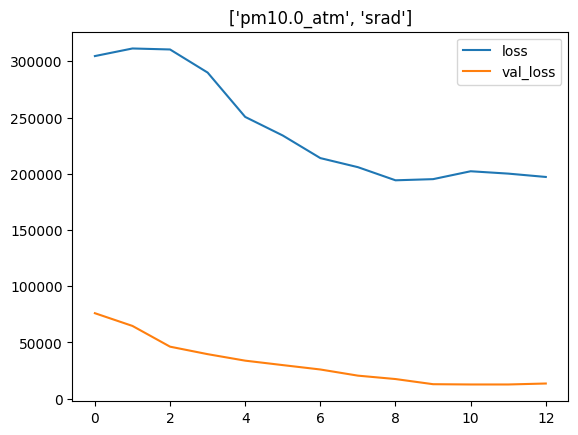

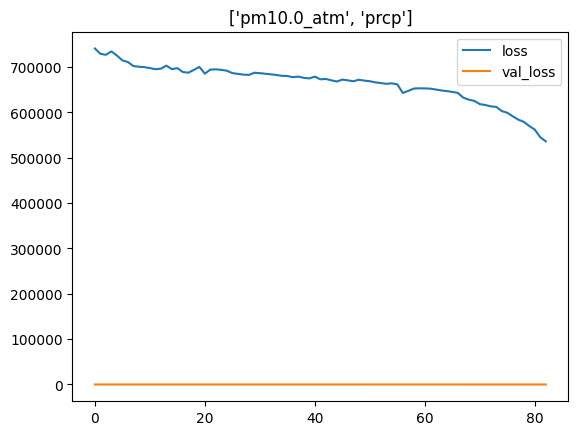

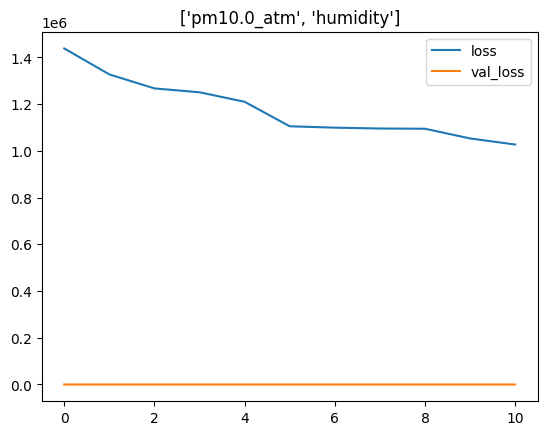

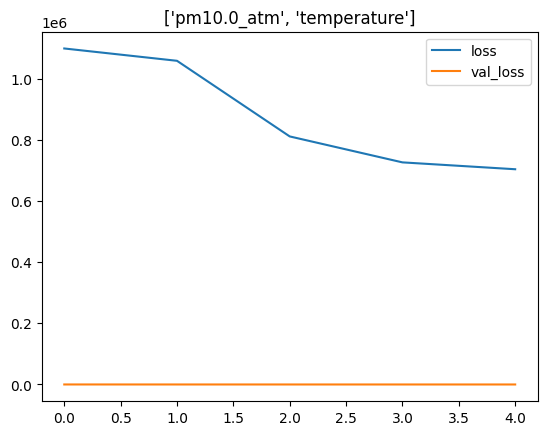

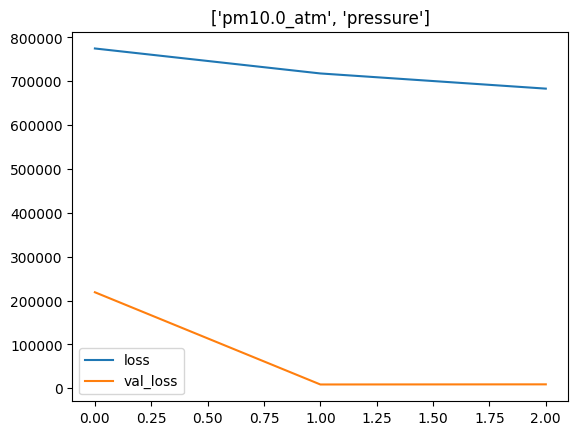

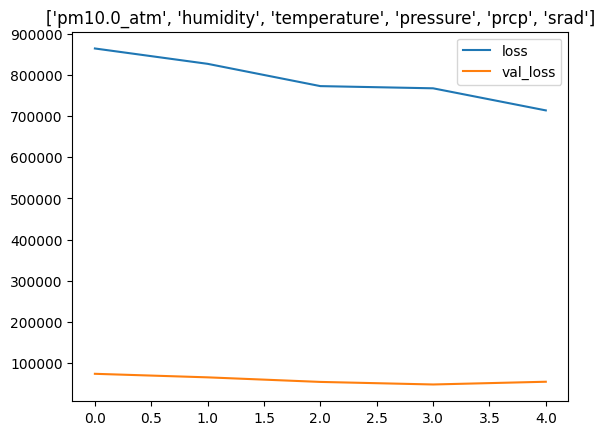

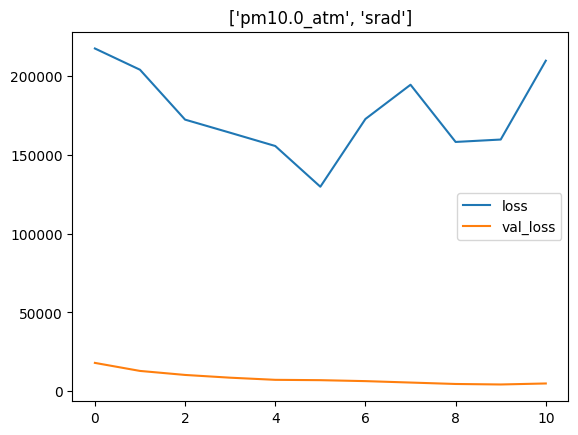

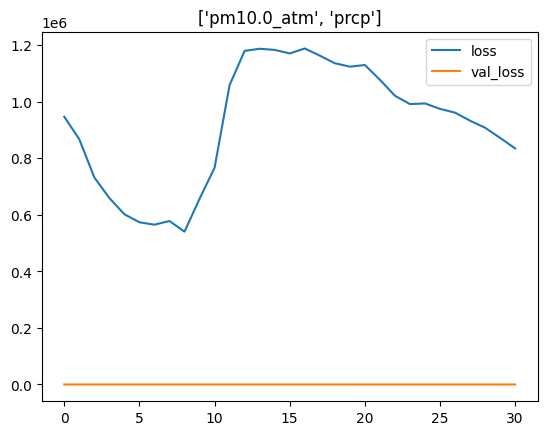

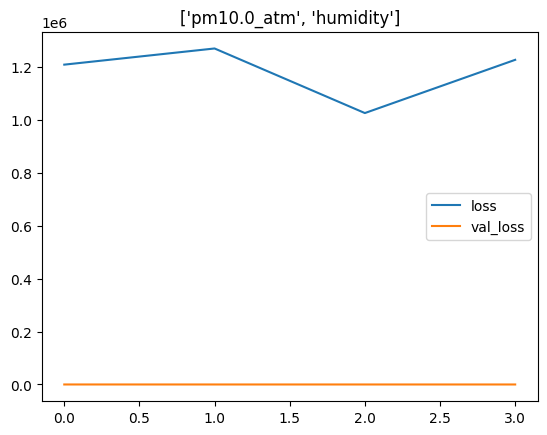

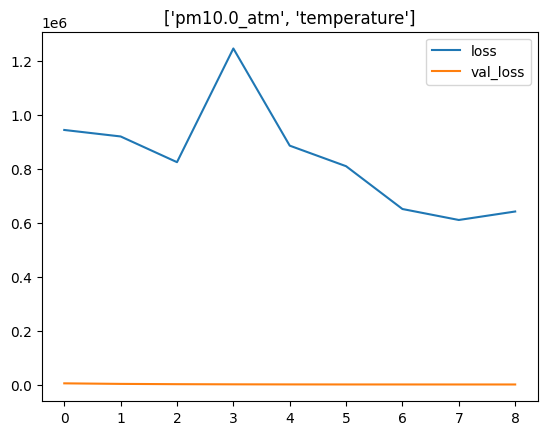

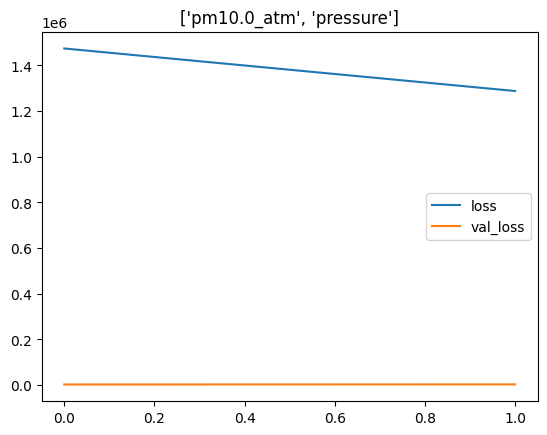

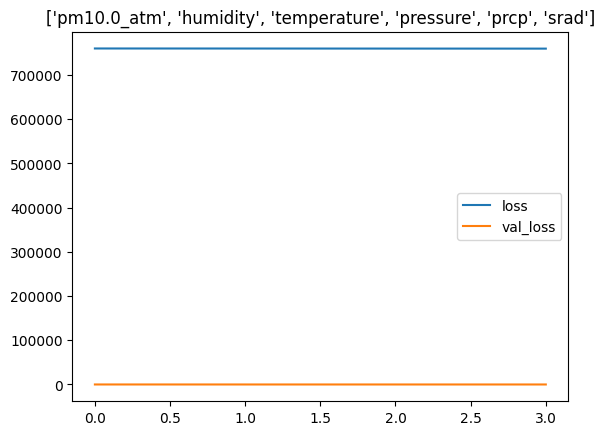

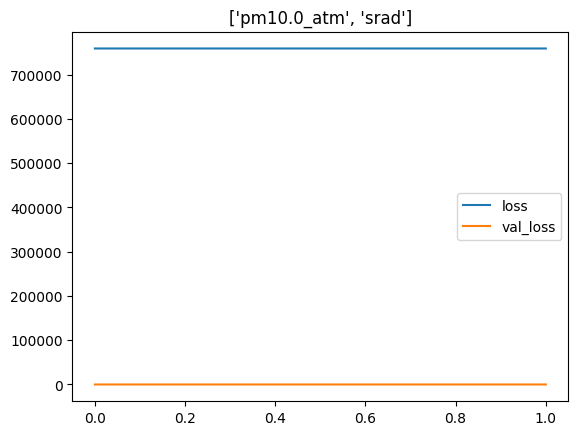

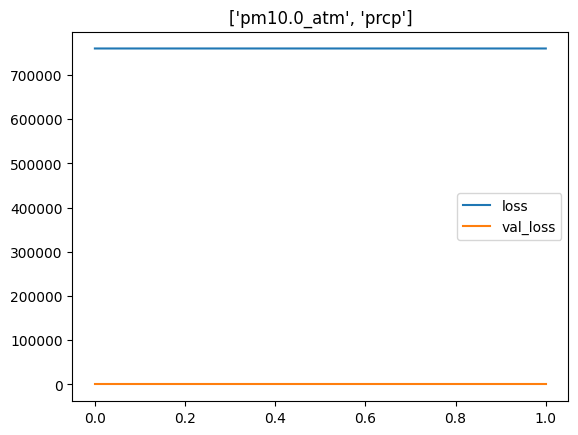

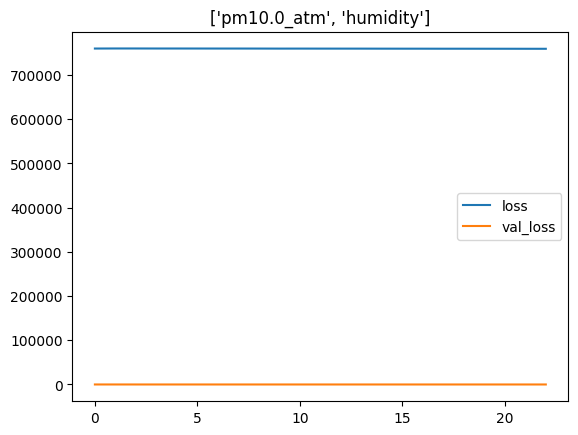

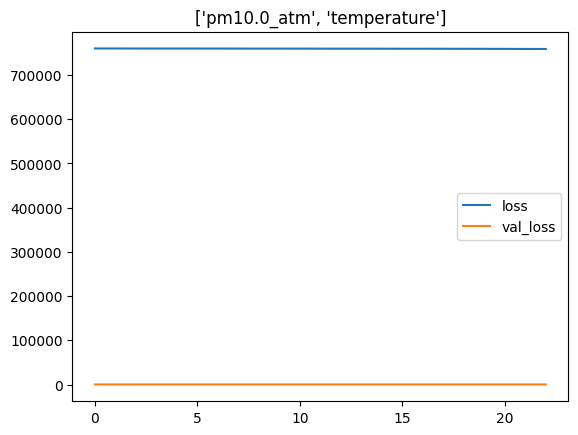

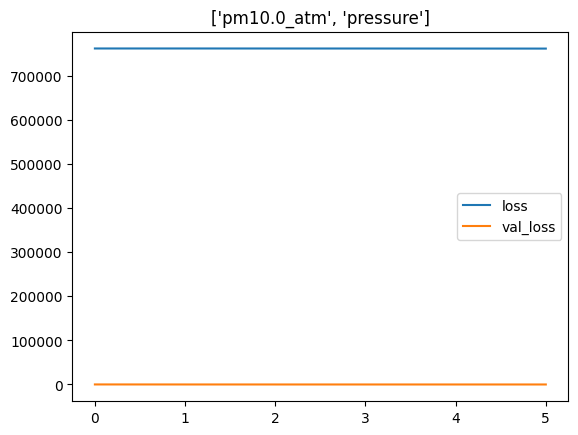

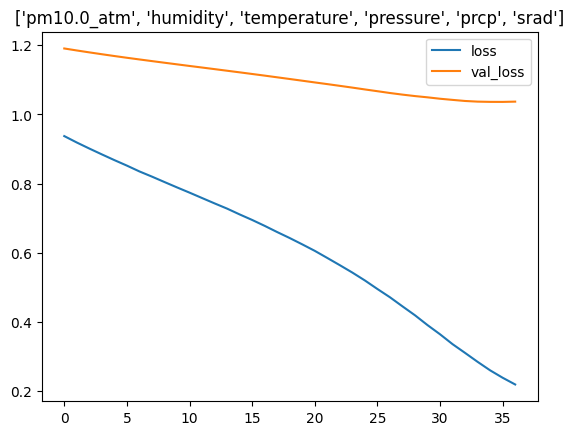

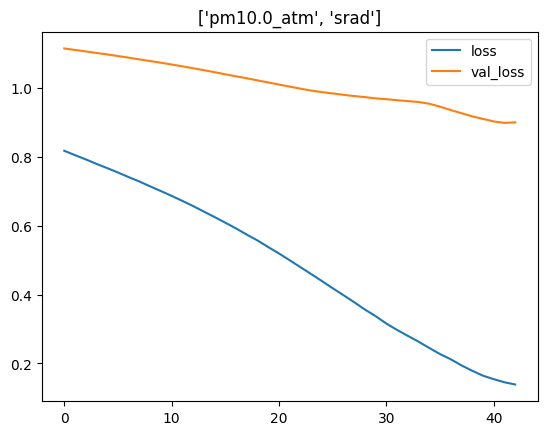

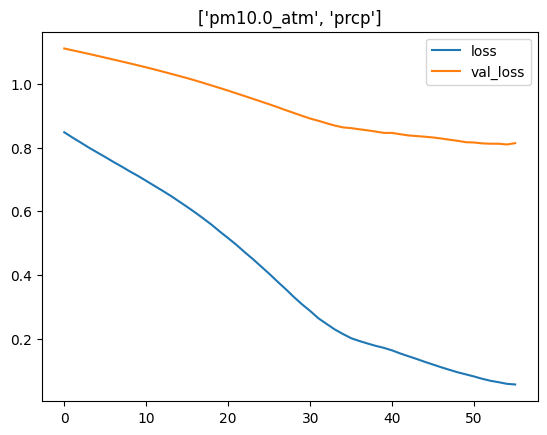

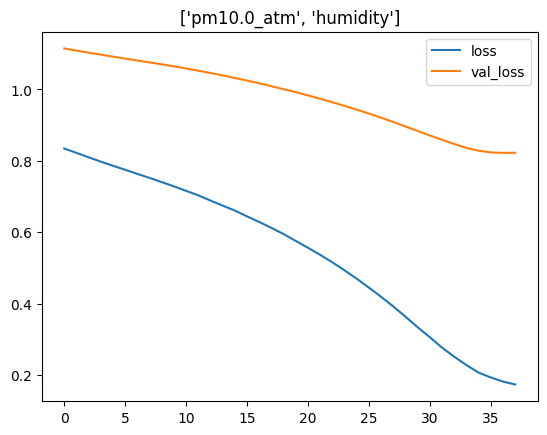

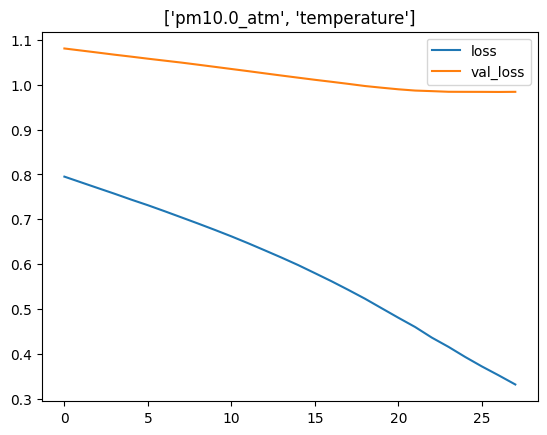

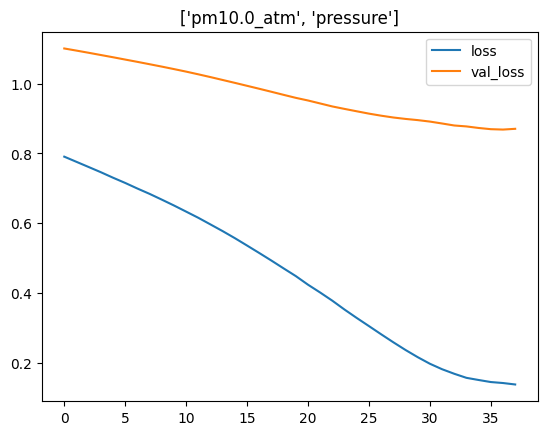

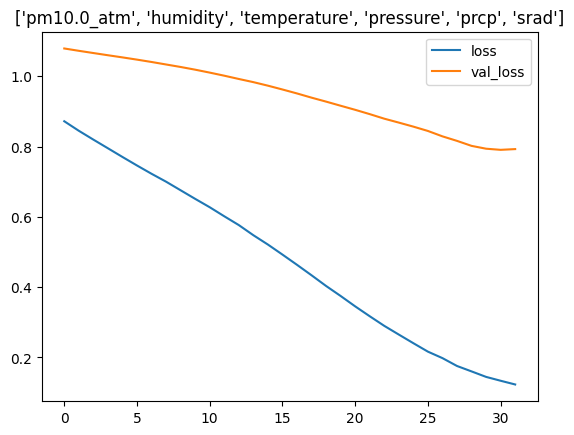

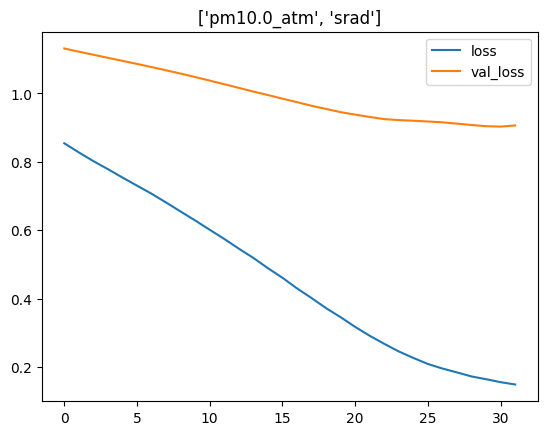

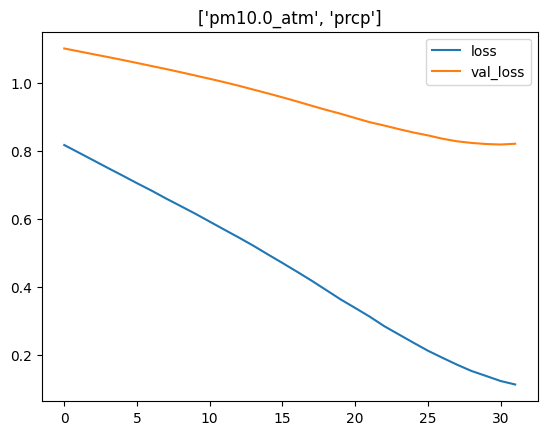

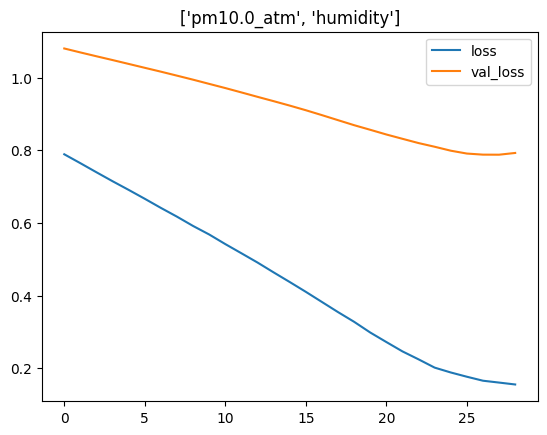

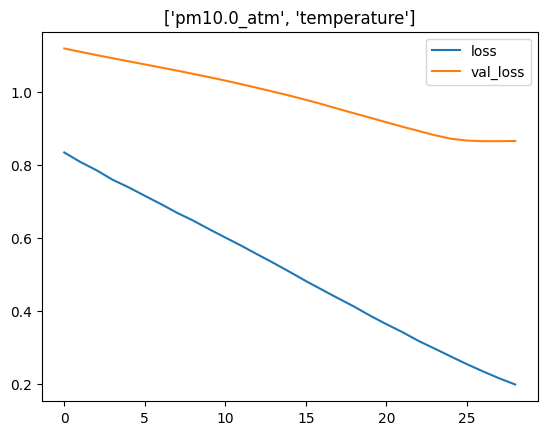

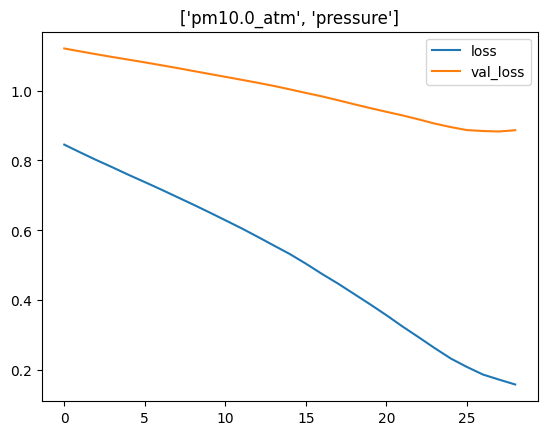

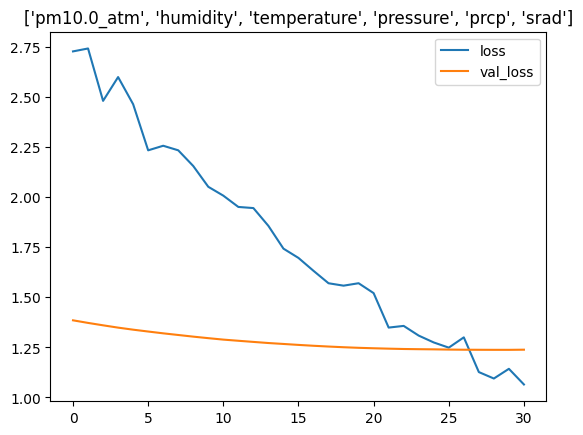

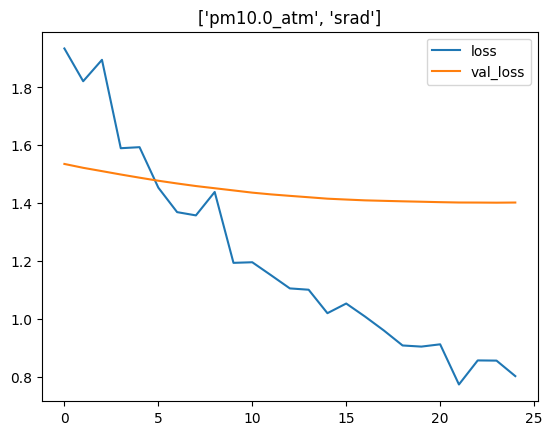

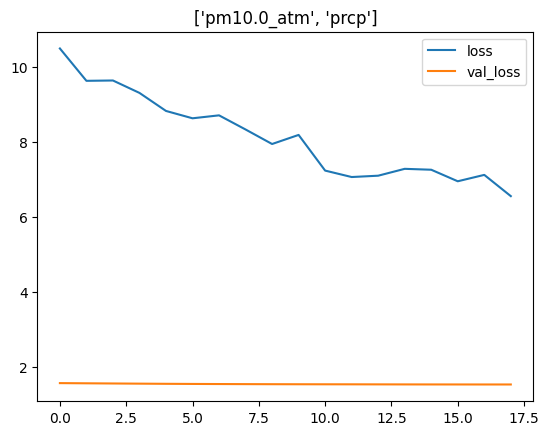

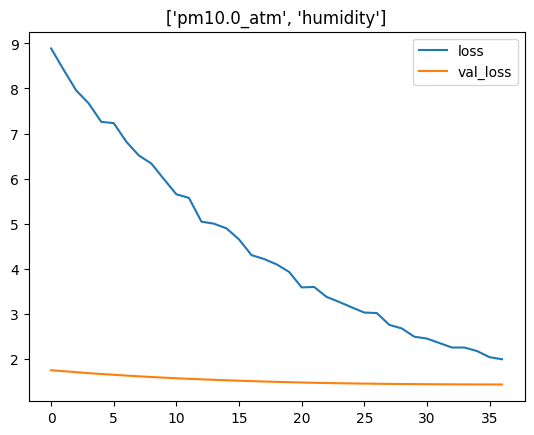

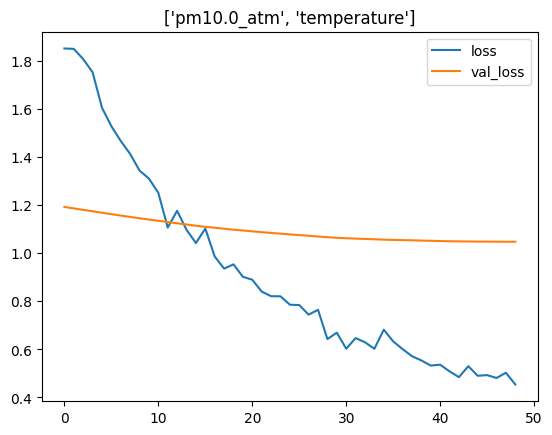

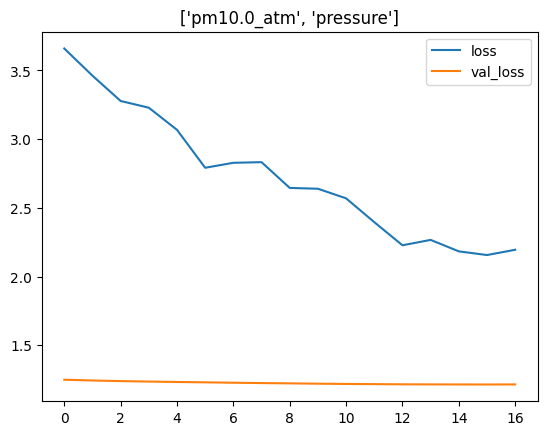

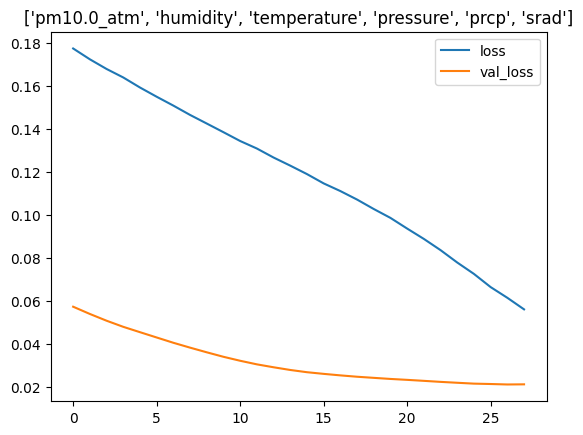

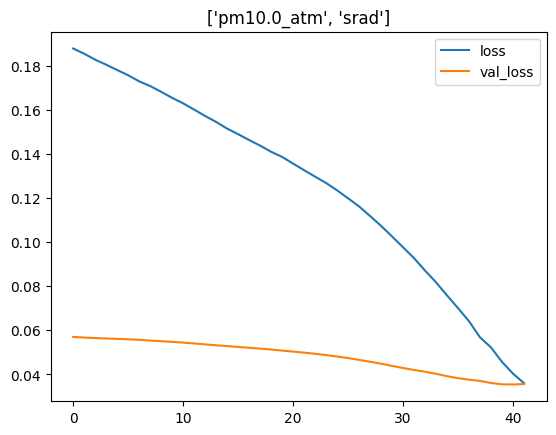

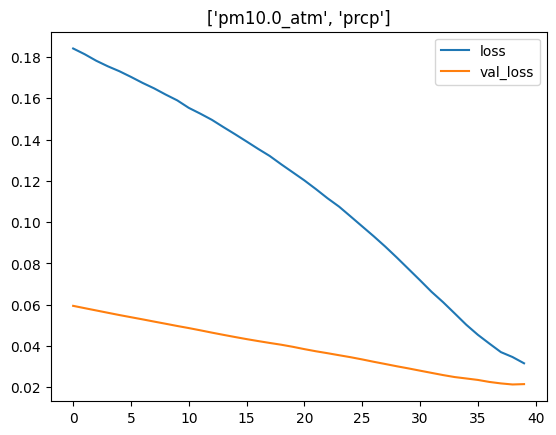

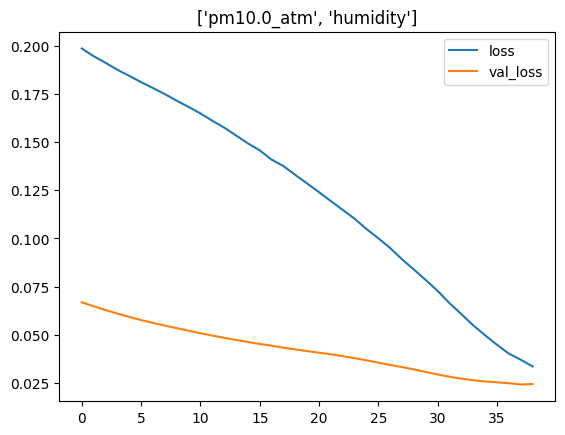

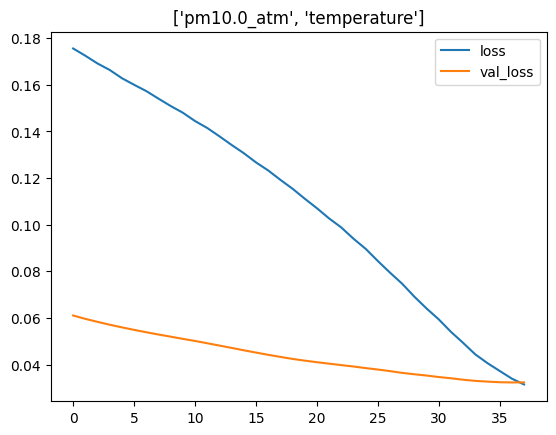

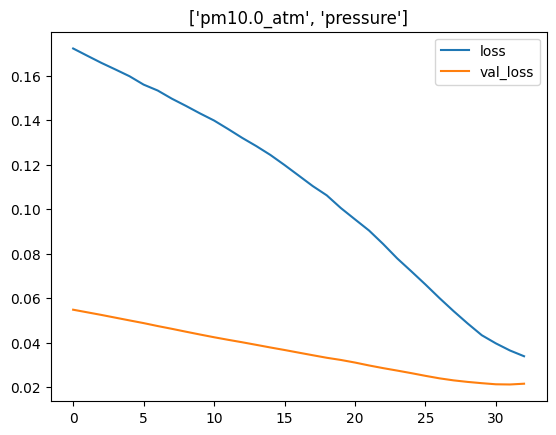

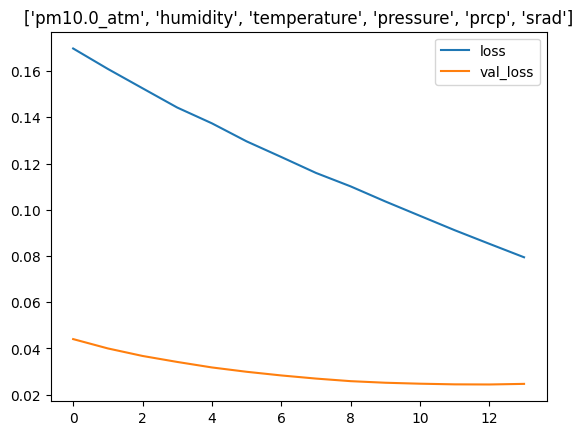

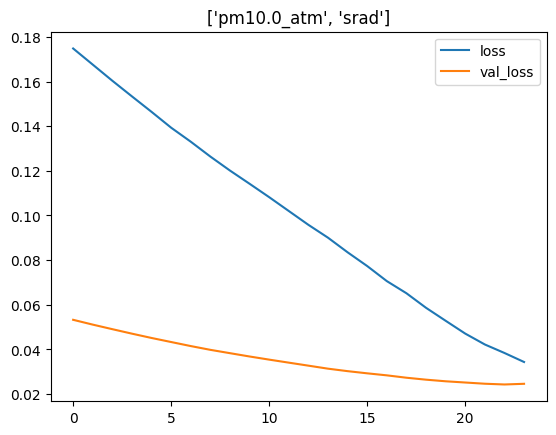

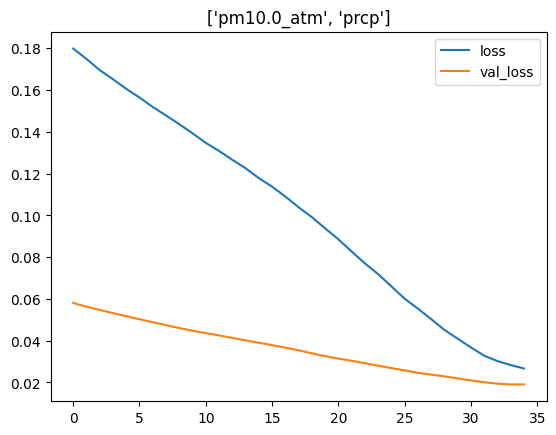

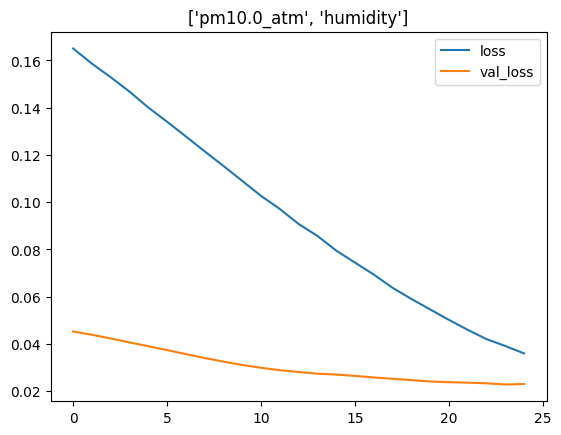

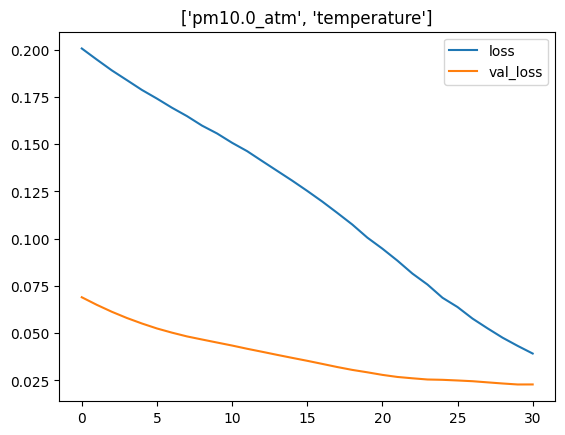

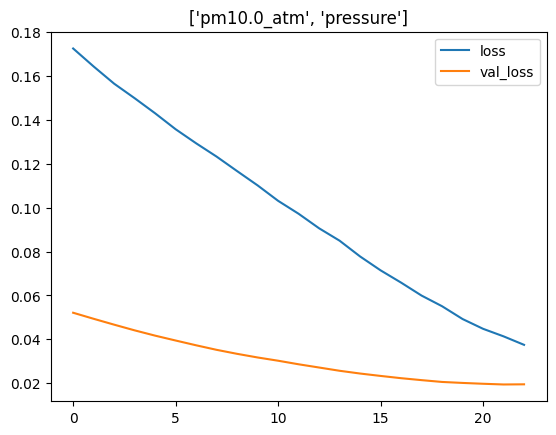

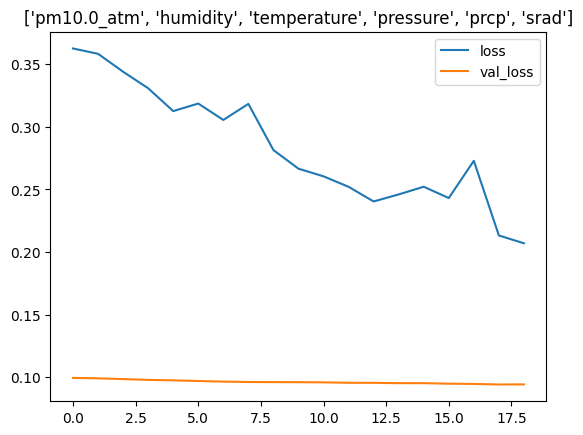

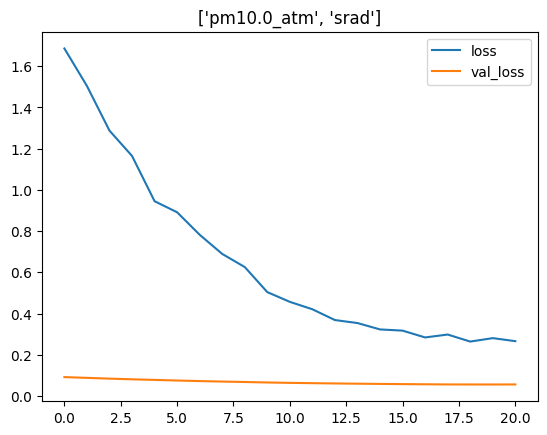

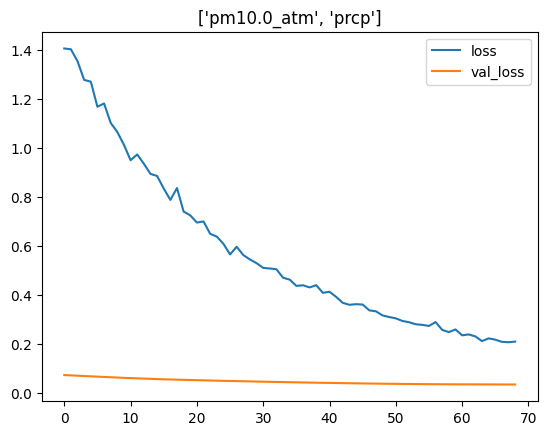

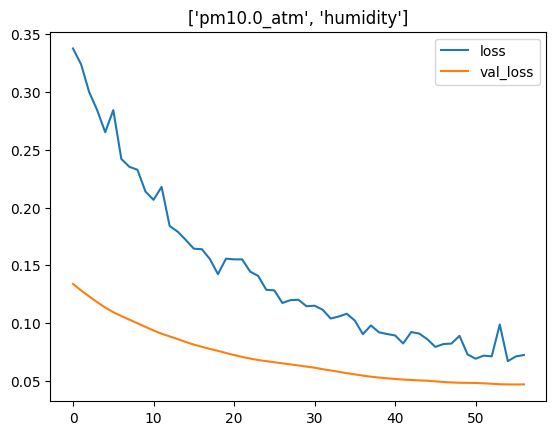

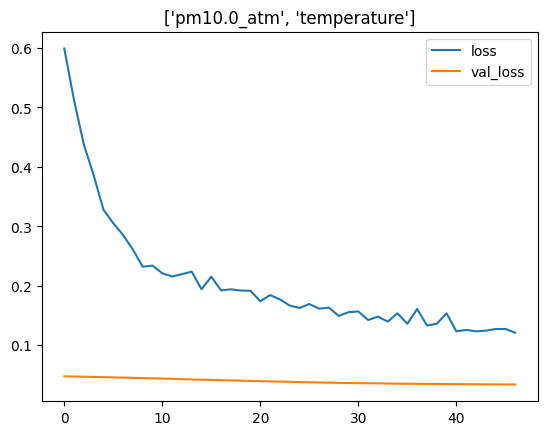

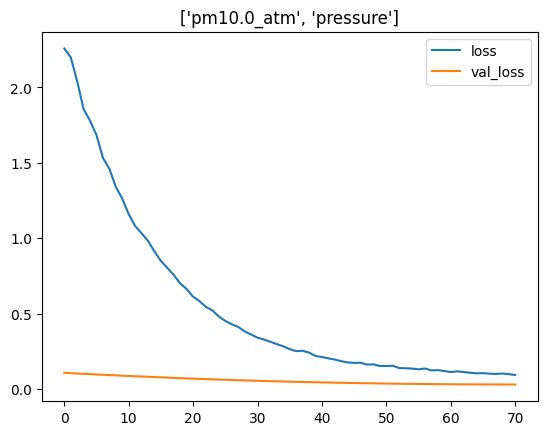

In [21]:
%%time

from tensorflow.keras.layers import Reshape, Dense, Flatten, Dropout, MaxPooling1D, TimeDistributed, LSTM, BatchNormalization, Input, concatenate, Conv1D

# create multi-variable time-series
def split_df( df, n_days, kk, k, S=None ):
  df = df[ kk ]
  if suffix == '-':
    S=None
    print('dont preprocess')
  else:
    if S is None:
      if suffix =='-SC1':
        S = StandardScaler()
      elif suffix=='-SC2':
        S = Pipeline( [('standardizer', StandardScaler()), ('scaler', MinMaxScaler())] )
      S.fit( df )
    XX = S.fit_transform( df )
    df[ kk ]= XX

  X, y = list(), list()
  n= len(df)

  for i in range(n):
    # find the end of this pattern
    end_ix = i + n_days
    # check if we are beyond the sequence
    if end_ix > len(df)-1:
      break
    # gather input and output parts of the pattern
    seq_x = df.iloc[i:end_ix, : ].values
    seq_y = df.iloc[end_ix, 0 ]
    X.append(seq_x)
    y.append(seq_y)

  return np.array(X), np.array(y), S



def train_eval_multi(s1, s2, L, k = 'pm10.0_atm'):

  n_days, n_features = 14, len(L) # 2-week

  print('window size of', n_days, 'days', n_features , 'features')

  # split the 1d sequence into forecasting training set
  X,Y={},{}

  trn = pa_df.loc[grps.groups[s1]][:365//3]
  val = pa_df.loc[grps.groups[s1]][365//3:(365//3*2)]

  t='trn'; X[t], Y[t], Scaler = split_df(trn, n_days, L, L[0] )
  t='val'; X[t], Y[t], _ = split_df(val, n_days, L, L[0], Scaler )

  # test on a different sensor
  tst = pa_df.loc[grps.groups[s2]]
  t='tst'; X[t], Y[t], _ = split_df( tst, n_days, L, L[0], Scaler )

  #t='trn'; assert Scaler.transform( trn[L] )[n_days, 0 ] == Y[t][0]  #  trn[:15] is a concatenation of  X[t][:14] and Y[t][0]

  # https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

  for t in ['trn','val','tst']:
    n_subsamples = 2
    n_days2 = n_days// n_subsamples
    if 'cnn' in mid:
      nd = n_days*n_features
      X[t] = X[t].reshape( (X[t].shape[0], nd ))

  model2 = Sequential()
  if 'bi' in mid:
    model2.add( Bidirectional(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_days, n_features))) )
    model2.add( Bidirectional(LSTM(50, activation='relu')) )
  elif 'cnn' in mid:
    model2.add( Reshape((n_days, n_features), input_shape=(nd,)))
    model2.add( Conv1D(14, kernel_size=3, activation='relu'))
    model2.add( Conv1D(14, kernel_size=3, activation='relu'))
    model2.add( BatchNormalization())
    model2.add( MaxPooling1D(pool_size=2) )
    model2.add( Flatten())
  else:
    model2.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_days, n_features)))
    model2.add(LSTM(50, activation='relu'))
  model2.add(Dense(1))

  LR=0.0001
  opt = keras.optimizers.Adam(learning_rate=LR )
  model2.compile(optimizer=opt, loss=LOSS )

  C = []
  C.append( tf.keras.callbacks.EarlyStopping(monitor="val_loss",
            min_delta=0,
            patience=0,
            verbose=0,
            mode="auto",
            baseline=None,
            restore_best_weights=False,
            start_from_epoch=0,)
  )
  t ='trn'
  h = model2.fit(X[t], Y[t], validation_data=(X['val'], Y['val']), epochs=5000, verbose=0, callbacks=C)
  hist = h.history

  plt.figure()
  for kk in hist.keys():
    plt.plot( hist[kk], label=kk )
  plt.legend()
  plt.title(L)
  print( model2.summary() )
  return eval_model(model2, X, Y )


for suffix in [ '-', '-SC1', '-SC2' ]:
  for arc in ['', 'bi', 'cnn']:

    if 1:
      L=['pm10.0_atm', 'humidity', 'temperature', 'pressure', 'prcp', 'srad']
      mid =arc+f'lstm-{len(L)}vars' + suffix
      a,b,c= train_eval_multi( s1, s2, L=L )
      Res_DF.loc[len(Res_DF)] = np.array( [mid, a,b,c])

    if 0:
      L=['pm10.0_atm', 'humidity', 'temperature', 'pressure', 'prcp']
      mid = arc+f'lstm-{len(L)}vars'
      a,b,c=train_eval_multi( s1, s2, L=L )
      Res_DF.loc[len(Res_DF)] = np.array( [mid, a,b,c])

      L=['pm10.0_atm', 'humidity', 'temperature', 'pressure', ]
      mid = arc+f'lstm-{len(L)}vars'
      a,b,c=train_eval_multi( s1, s2, L=L )
      Res_DF.loc[len(Res_DF)] = np.array( [mid, a,b,c])

    if 1:
      L=['pm10.0_atm', 'srad', ]
      mid = arc+ 'lstm-' + L[-1] + suffix
      a,b,c=train_eval_multi( s1, s2, L=L )
      Res_DF.loc[len(Res_DF)] = np.array( [mid, a,b,c])


      L=['pm10.0_atm', 'prcp', ]
      mid = arc+ 'lstm-' + L[-1] + suffix
      a,b,c=train_eval_multi( s1, s2, L=L )
      Res_DF.loc[len(Res_DF)] = np.array( [mid, a,b,c])


      L=['pm10.0_atm', 'humidity', ]
      mid = arc+ 'lstm-' + L[-1] + suffix
      a,b,c=train_eval_multi( s1, s2, L=L )
      Res_DF.loc[len(Res_DF)] = np.array( [mid, a,b,c])

      L=['pm10.0_atm', 'temperature', ]
      mid = arc+ 'lstm-' + L[-1] + suffix
      a,b,c=train_eval_multi( s1, s2, L=L )
      Res_DF.loc[len(Res_DF)] = np.array( [mid, a,b,c])


      L=['pm10.0_atm', 'pressure', ]
      mid = arc+ 'lstm-' + L[-1] + suffix
      a,b,c=train_eval_multi( s1, s2, L=L )
      Res_DF.loc[len(Res_DF)] = np.array( [mid, a,b,c])



In [22]:
LOSS

'mean_squared_error'

In [23]:
Res_DF.R2=Res_DF.R2.astype(float)
Res_DF.MdAE=Res_DF.MdAE.astype(float)
Res_DF.RMSE=Res_DF.RMSE.astype(float)

In [24]:
import plotly.express as px
px.bar( Res_DF.iloc[:24,:], y='MdAE', x='setting' )

In [25]:

px.bar( Res_DF.iloc[24:,:], y='MdAE', x='setting' )

In [26]:
px.bar( Res_DF, y='R2', x='setting' )

In [27]:
px.bar( Res_DF, y='RMSE', x='setting' )

In [28]:
def compare( met_name='MdAE'  ):
  plt.figure( figsize=(20,3))
  M = Res_DF.shape[0]
  thickness = 4
  for i,r in enumerate( Res_DF.iterrows() ):
    k = r[1]['setting']
    m = r[1][ met_name ]
    n=len(m)
    q=365//3
    a=np.arange( 0, q*n, q )
    plt.bar( a+i*thickness, m, thickness, label = k )
  plt.legend()
  plt.title( f'{met_name} of test set for each method compared' )

#compare()

## Performance measures achieved by different model-variable combinations


In [29]:
Res_DF.head(1000)

,setting,R2,RMSE,MdAE
0,bilstm-uni-,0.519721,6.519713,32.454510
1,lstm-uni-,0.343908,6.124216,14.014441
2,bilstm-uni-SC1,0.451511,0.030420,0.034550
3,lstm-uni-SC1,0.388910,0.015789,0.021811
4,bilstm-uni-SC2,0.464916,0.002982,0.004782
5,lstm-uni-SC2,0.436050,0.001731,0.004987
6,lstm-6vars-,-0.078200,337.165979,399.543744
7,lstm-srad-,-0.230940,57.046990,99.331516
8,lstm-prcp-,0.148582,4.716447,21.586662
9,lstm-humidity-,0.232839,4.334292,10.458576
